In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models,metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from packaging import version




In [24]:
%load_ext tensorboard
!rm -rf ./logs/ 
from google.colab import drive
drive.mount('/content/gdrive')
PATH_OF_DATA= '/content/gdrive/"My Drive"/garythung-trashnet'
!ls {PATH_OF_DATA}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
models	models1  test_set  train_set


In [0]:
def alexnet_architecture():

    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
    strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(6))
    model.add(Activation('softmax'))
    return model


In [0]:


model=alexnet_architecture()


In [6]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/train_set",
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="categorical",
                    
                                                shuffle=True
                                                )
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=32)


Found 2060 images belonging to 6 classes.
Found 490 images belonging to 6 classes.


In [0]:

checkpoint_path = "/content/gdrive/My Drive/garythung-trashnet/models/classifieralex.ckpt" 
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002),
              loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights(checkpoint_path)

In [21]:


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size
history=model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [cp_callback])

Epoch 1/5
63/64 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9419
Epoch 00001: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifieralex.ckpt
64/64 [==============================] - 34s 538ms/step - loss: 0.1905 - accuracy: 0.9403 - val_loss: 1.6788 - val_accuracy: 0.6438
Epoch 2/5
63/64 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9304
Epoch 00002: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifieralex.ckpt
64/64 [==============================] - 34s 535ms/step - loss: 0.2133 - accuracy: 0.9310 - val_loss: 2.2622 - val_accuracy: 0.5604
Epoch 3/5
63/64 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9294
Epoch 00003: saving model to /content/gdrive/My Drive/garythung-trashnet/models/classifieralex.ckpt
64/64 [==============================] - 34s 533ms/step - loss: 0.2090 - accuracy: 0.9305 - val_loss: 1.6109 - val_accuracy: 0.6667
Epoch 4/5
63/64 [========

{'loss': [0.28543051395425667, 0.2744274715464966, 0.20817554584856804, 0.25094230199706624, 0.2645052964165366], 'accuracy': [0.9077909, 0.90680474, 0.9260355, 0.9092702, 0.9142012], 'val_loss': [1.8703209320704142, 5.9282705624898275, 1.711948808034261, 2.826495615641276, 1.5786703824996948], 'val_accuracy': [0.60625, 0.30416667, 0.64375, 0.44166666, 0.62708336]}


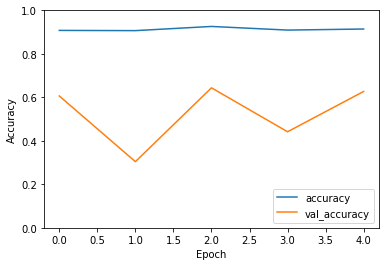

In [13]:
print(history.history)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

{'loss': [0.28543051395425667, 0.2744274715464966, 0.20817554584856804, 0.25094230199706624, 0.2645052964165366], 'accuracy': [0.9077909, 0.90680474, 0.9260355, 0.9092702, 0.9142012], 'val_loss': [1.8703209320704142, 5.9282705624898275, 1.711948808034261, 2.826495615641276, 1.5786703824996948], 'val_accuracy': [0.60625, 0.30416667, 0.64375, 0.44166666, 0.62708336]}


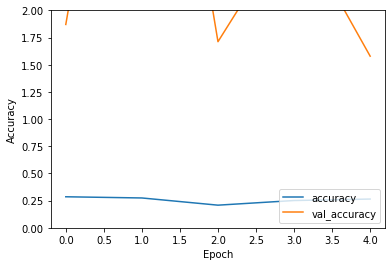

In [14]:
print(history.history)
plt.plot(history.history['loss'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [15]:
test = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=490)
test_img,test_label=next(test)



Found 490 images belonging to 6 classes.


In [0]:
y_pred=model.predict_classes(test_img)


In [0]:
# print(y_pred.shape[0])
test_p=[]
for i in range(test_label.shape[0]):
  flag=0
  for j in range(test_label.shape[1]):
      if(test_label[i][j]==1):
        test_p.append(j)


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
con_mat = confusion_matrix(test_p,y_pred)
print(con_mat)

[[41  6  1  7  4  5]
 [ 1 50  3  4  4  3]
 [ 7 23 48  6 18  6]
 [ 0  4  2 18  6  6]
 [ 1  8  1  4 93  3]
 [ 2 27  3  6 12 57]]


In [26]:
test.class_indices
test_loss, test_acc = model.evaluate(test_img,  test_label)
print(test_acc)
print(test_loss)

490/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

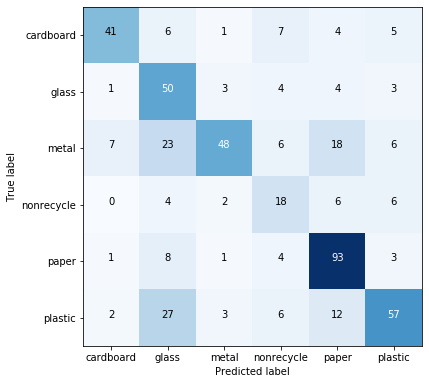

In [20]:
def plot_confusion_matrix(cm,
                          target_names):

	cmap = plt.get_cmap('Blues')

	plt.figure(figsize=(6, 6))
	plt.imshow(cm, interpolation='nearest', cmap=cmap)

	if target_names is not None:
		tick_marks = np.arange(len(target_names))
		plt.xticks(tick_marks, target_names)
		plt.yticks(tick_marks, target_names)

	thresh = cm.max() / 2
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, "{:,}".format(cm[i, j]),
					horizontalalignment="center",
					color="white" if cm[i, j] > thresh else "black")
	
	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.tight_layout()
	plt.show()
 
labels = ['cardboard','glass','metal','nonrecycle','paper','plastic']
plot_confusion_matrix(con_mat, labels)

In [27]:
print(classification_report(test_p, y_pred, target_names=labels))

              precision    recall  f1-score   support

   cardboard       0.79      0.64      0.71        64
       glass       0.42      0.77      0.55        65
       metal       0.83      0.44      0.58       108
  nonrecycle       0.40      0.50      0.44        36
       paper       0.68      0.85      0.75       110
     plastic       0.71      0.53      0.61       107

    accuracy                           0.63       490
   macro avg       0.64      0.62      0.61       490
weighted avg       0.68      0.63      0.63       490

